In [ ]:
from google.colab import files
import pandas as pd

# Upload the file from your local desktop
uploaded = files.upload()
filename = "Medicaldataset_Mod4.csv"

# Read the uploaded CSV file into a pandas DataFrame
if filename in uploaded:
  df_mod = pd.read_csv(filename)

  # Display the first few rows of the DataFrame
  print(f"Successfully loaded '{filename}':")
  display(df_mod.head())
else:
  print(f"File '{filename}' not found in the uploaded files. Please ensure you uploaded the correct file.")


Saving Medicaldataset_Mod4.csv to Medicaldataset_Mod4.csv
Successfully loaded 'Medicaldataset_Mod4.csv':


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,Male,66,160,83,160.0,1.80,0.012,negative
1,21,Male,94,98,46,296.0,6.75,1.060,positive
2,55,Male,64,160,77,270.0,1.99,0.003,negative
3,64,Male,70,120,55,270.0,13.87,0.122,positive
4,55,Male,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df_mod.dtypes

,0
Age,int64
Gender,object
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


In [ ]:
# Check for missing values in each column
missing_values = df_mod.isnull().sum()

# Display the number of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [ ]:
# Assign each column as a variable
for column in df_mod.columns:
  globals()[column.replace(" ", "_").replace("-", "_")] = df_mod[column]

# You can now access each column using its name as a variable
# For example, to display the 'Age' column:
# display(Age)

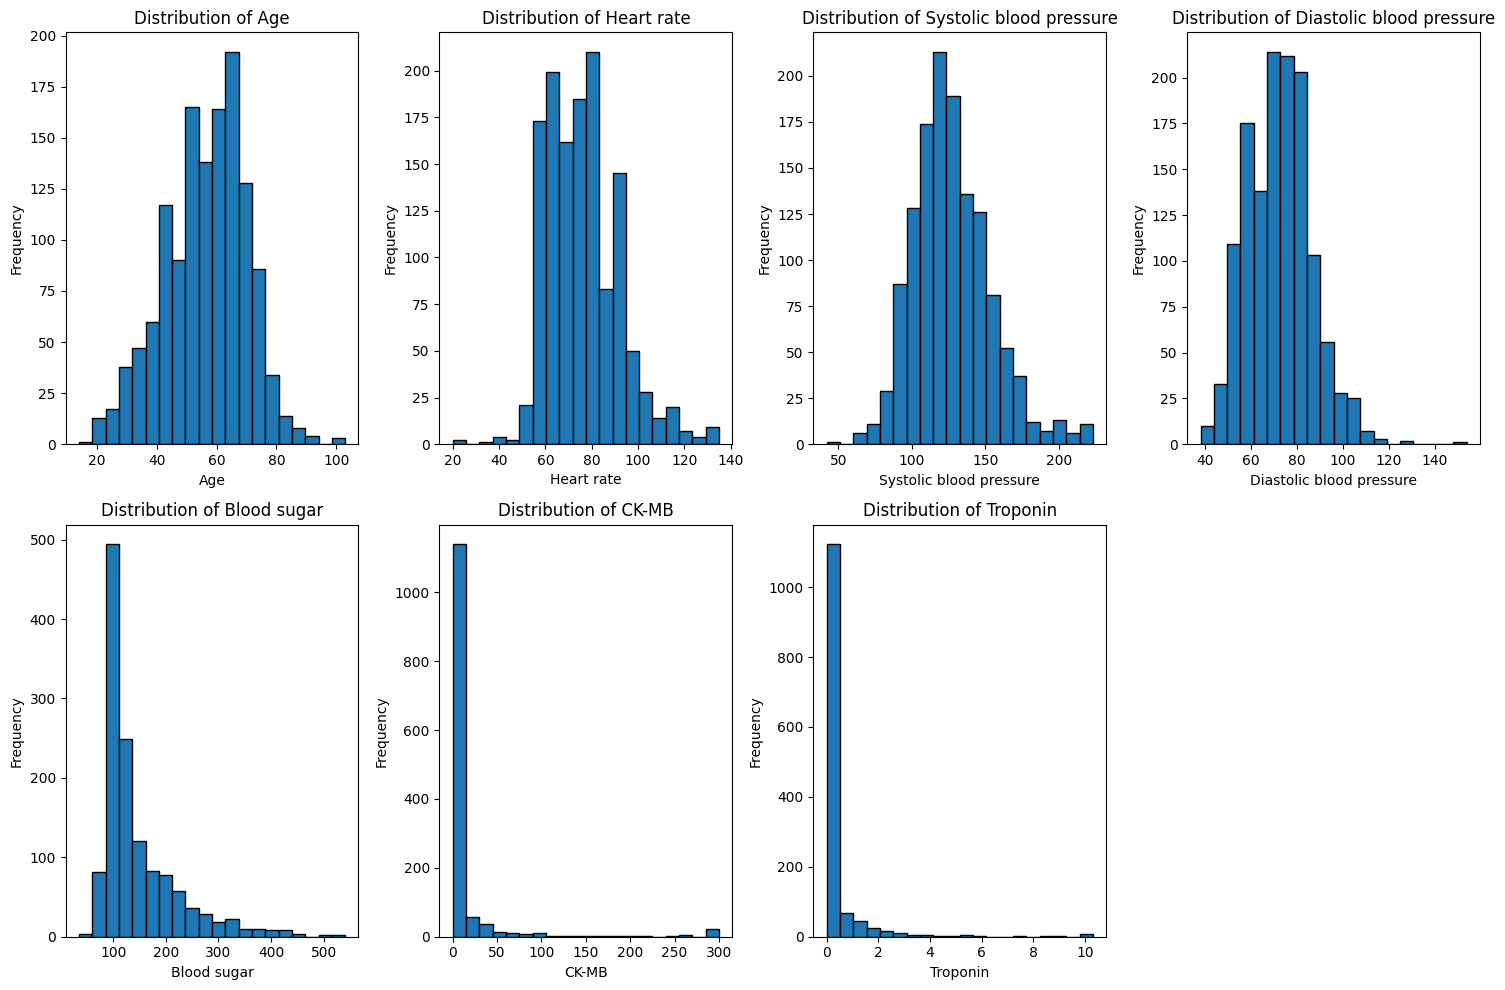

In [ ]:
import matplotlib.pyplot as plt
import math

# Select only numerical columns for histograms
numerical_cols = df_mod.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
n_cols = 4  # You can adjust the number of columns
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create subplots for each numerical variable
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    axes[i].hist(df_mod[col], bins=20, edgecolor='black') # You can adjust the number of bins
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
# Select only numerical columns for the correlation matrix
#df_mod["Gender"] = df_mod["Gender"].astype('category')
numerical = df_mod.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical.corr().round(2)

# Display the correlation matrix
display(correlation_matrix)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
Age,1.00,-0.00,0.02,0.00,-0.00,0.02,0.09
Heart rate,-0.00,1.00,-0.04,0.12,0.01,-0.00,0.04
Systolic blood pressure,0.02,-0.04,1.00,0.59,0.02,-0.02,0.04
Diastolic blood pressure,0.00,0.12,0.59,1.00,-0.03,-0.02,0.04
Blood sugar,-0.00,0.01,0.02,-0.03,1.00,0.05,0.02
CK-MB,0.02,-0.00,-0.02,-0.02,0.05,1.00,-0.02
Troponin,0.09,0.04,0.04,0.04,0.02,-0.02,1.00


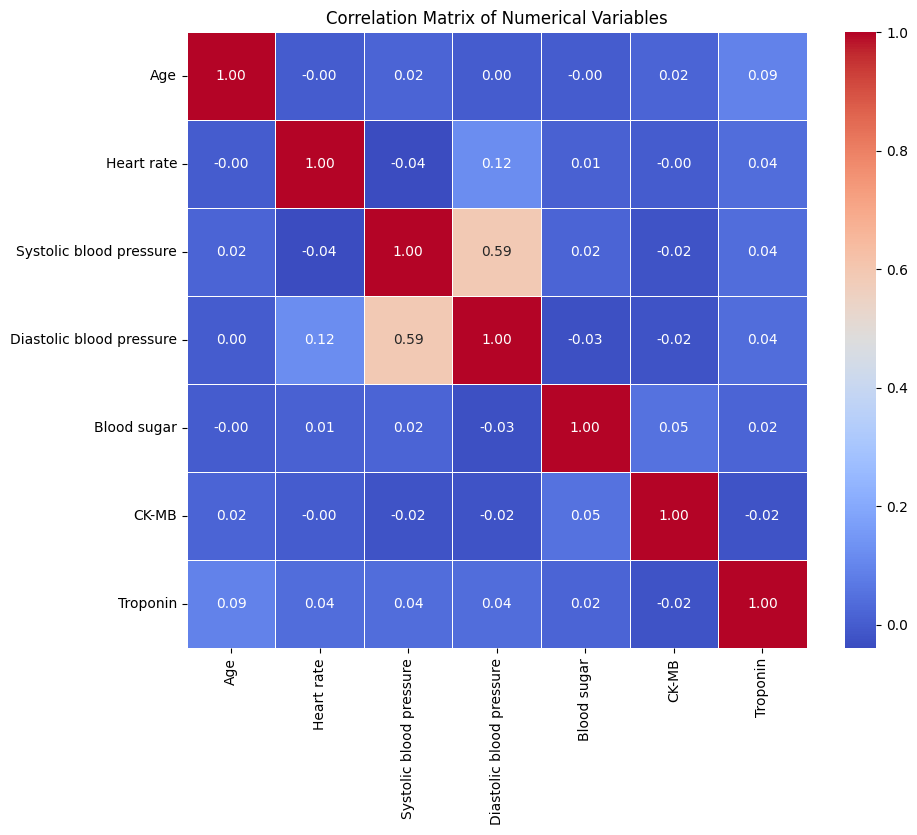

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
# Add the 'Result' column back to the numerical DataFrame
heartattack = numerical.copy()
heartattack['Result'] = Result

# Calculate the correlation matrix including the 'Result' column
correlation_matrix = heartattack.corr()

# Get the correlations specifically with the 'Result' column
correlation_with_result = correlation_matrix['Result'].sort_values(ascending=False).round(2)

# Display the correlations with the 'Result' column
print("Correlation of each variable with 'Result':")
display(correlation_with_result)

Correlation of each variable with 'Result':


,Result
Result,1.00
Age,0.24
Troponin,0.23
CK-MB,0.22
Heart rate,0.01
Diastolic blood pressure,-0.01
Systolic blood pressure,-0.02
Blood sugar,-0.03


In [ ]:
# To confirm with the correlation matrix preformed above, use the linear pearson correlation with the variable 'result'

# Display variables significantly correlated with 'Result' (> 0.05)
# The P-value for the statistical test of whether the correlation coefficient is significantly different from zero is 0.2
significant_correlation_threshold = 0.05

print(f"\nVariables with absolute correlation > {significant_correlation_threshold} with 'Result':")
display(correlation_with_result[abs(correlation_with_result) > significant_correlation_threshold])


Variables with absolute correlation > 0.05 with 'Result':


,Result
Result,1.00
Age,0.24
Troponin,0.23
CK-MB,0.22


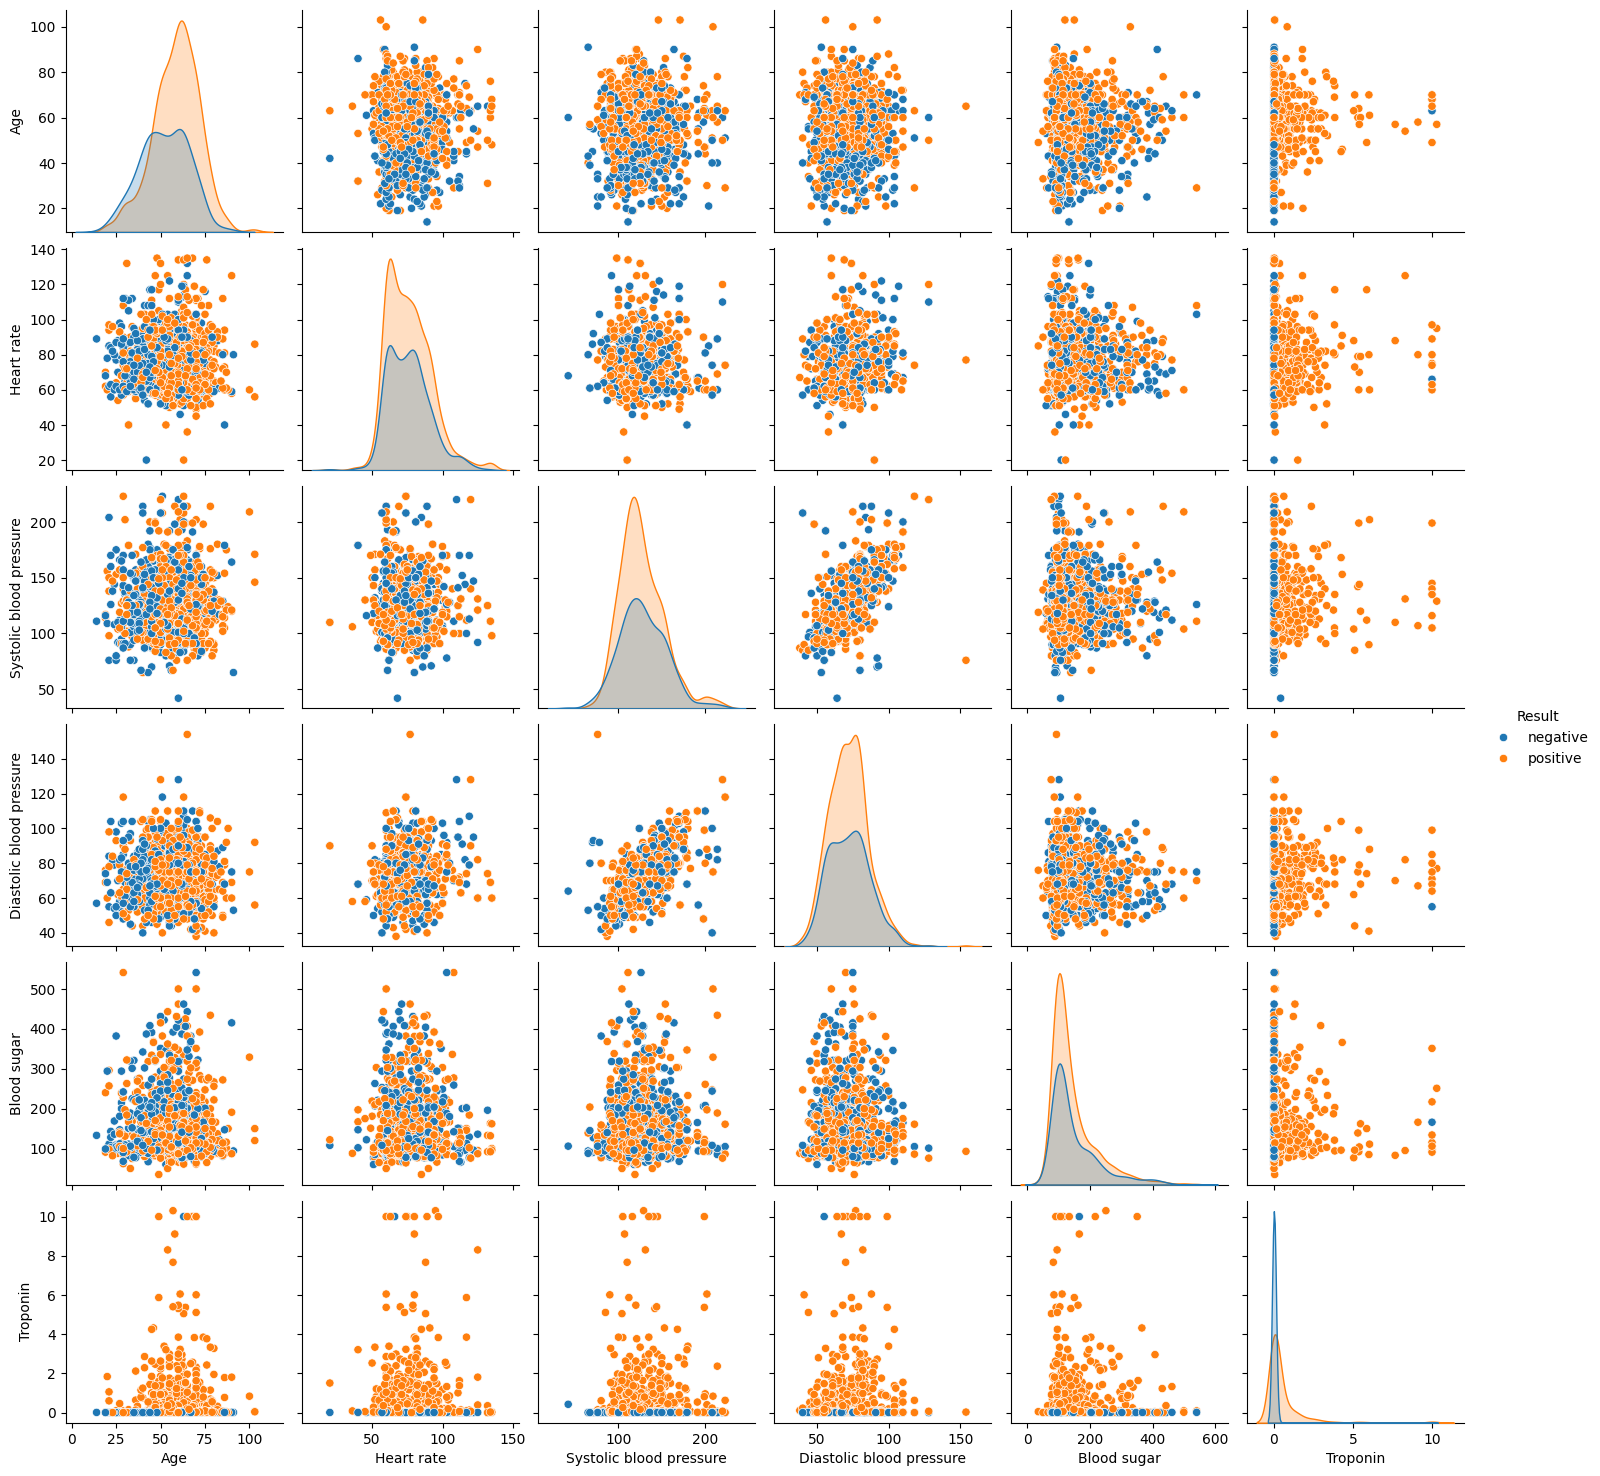

In [ ]:
sns.pairplot(df_mod, hue="Result", vars=["Age", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Blood sugar","Troponin"])
plt.show()

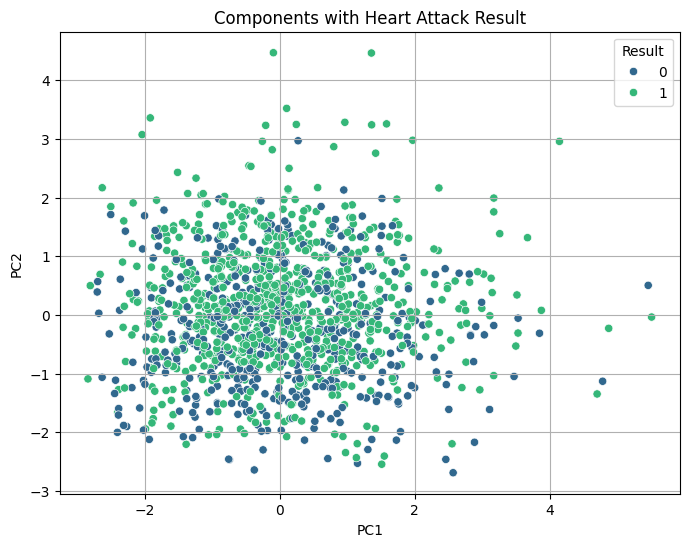

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To include Results and Gender
if df_mod['Result'].dtype == 'object':
    df_mod['Result'] = df_mod['Result'].map({'positive': 1, 'negative': 0})
if df_mod['Gender'].dtype == 'object':
    df_mod['Gender'] = df_mod['Gender'].map({'Male': 1, 'Female': 0})

# Select features (all columns except 'Result') and the target variable ('Result')
features = df_mod.drop('Result', axis=1)
target = df_mod['Result']

features_encoded = pd.get_dummies(features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Run PCA
pca = PCA(n_components=2)  # For visualization
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
pca_df_mod = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the 'Result' column to the PCA DataFrame using the target variable
pca_df_mod['Result'] = target

# Plot the PCA results with 'Result' as the hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df_mod, x='PC1', y='PC2', hue='Result', palette='viridis')
plt.title('Components with Heart Attack Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop the target column (optional) and encode categories
df_clustering = df_mod.copy()

# Convert categorical features to numeric (e.g., 'Sex', 'ExerciseAngina')
df_clustering = pd.get_dummies(df_clustering, drop_first=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)


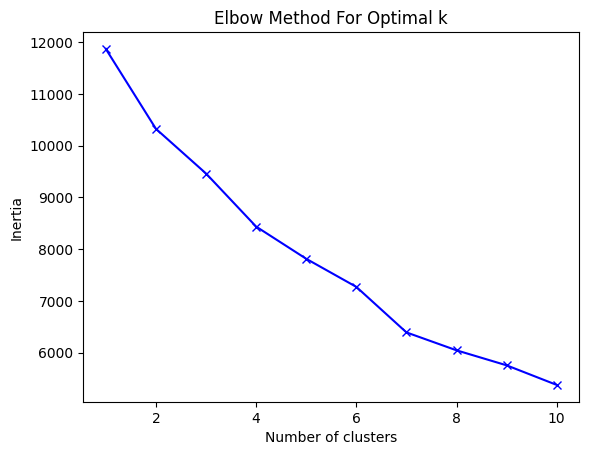

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different numbers of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42) # n_clusters=2 can be adjusted for 4
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
df_mod['Cluster'] = clusters

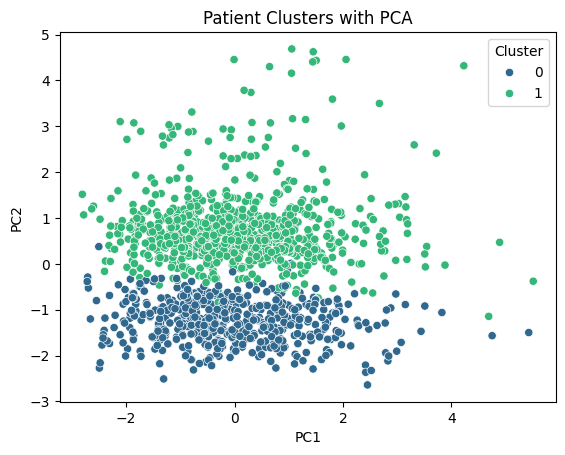

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2) # replace n_components=2 for 4 for 4 clusters
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results and cluster labels
pca_df_mod = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df_mod['Cluster'] = clusters

# Plot the clusters
sns.scatterplot(data=pca_df_mod, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Patient Clusters with PCA')
plt.show()


PC1 and PC2 represent directions of maximum variance in your scaled data. They’re combinations of the original variables.

In [ ]:
# View average characteristics per cluster

# Convert 'Gender' and 'Result' to numeric types in df_mod
if df_mod['Gender'].dtype == 'object':
    df_mod['Gender'] = df_mod['Gender'].map({'Male': 1, 'Female': 0})
if df_mod['Result'].dtype == 'object':
    df_mod['Result'] = df_mod['Result'].map({'positive': 1, 'negative': 0})

print(df_mod.groupby('Cluster').mean())

               Age    Gender  Heart rate  Systolic blood pressure  \
Cluster                                                             
0        52.072835  0.602362   75.940945               127.842520   
1        58.771887  0.695438   76.138101               126.749692   

         Diastolic blood pressure  Blood sugar      CK-MB  Troponin    Result  
Cluster                                                                        
0                       72.474409   149.725787   2.559404  0.007356  0.000000  
1                       72.140567   144.697904  23.238757  0.582424  0.998767  


In [ ]:
print("\nAverage characteristics per cluster:")
display(df_mod.groupby('Cluster').mean().round(2))


Average characteristics per cluster:


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Cluster,,,,,,,,,
0,52.07,0.6,75.94,127.84,72.47,149.73,2.56,0.01,0.0
1,58.77,0.7,76.14,126.75,72.14,144.70,23.24,0.58,1.0


In [ ]:
pd.DataFrame(pca.components_, columns=df_clustering.columns, index=['PC1', 'PC2'])

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Gender_Male,Result_positive
PC1,0.045121,0.105926,0.688802,0.703423,-0.004893,-0.042140,0.123403,0.011886,0.017934
PC2,0.441431,0.041256,-0.057198,-0.054986,0.005679,0.349531,0.444005,0.133994,0.678117


In [ ]:
# See loadings (influence of original variables)
# top contributors to PC1
import numpy as np

loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=df_clustering.columns)

print(loadings.sort_values('PC1', ascending=False).head(10))

                               PC1       PC2
Diastolic blood pressure  0.703423 -0.054986
Systolic blood pressure   0.688802 -0.057198
Troponin                  0.123403  0.444005
Heart rate                0.105926  0.041256
Age                       0.045121  0.441431
Result_positive           0.017934  0.678117
Gender_Male               0.011886  0.133994
Blood sugar              -0.004893  0.005679
CK-MB                    -0.042140  0.349531


In [ ]:
display(loadings.sort_values('PC1', ascending=False).head(10).round(2))

,PC1,PC2
Diastolic blood pressure,0.70,-0.05
Systolic blood pressure,0.69,-0.06
Troponin,0.12,0.44
Heart rate,0.11,0.04
Age,0.05,0.44
Result_positive,0.02,0.68
Gender_Male,0.01,0.13
Blood sugar,-0.00,0.01
CK-MB,-0.04,0.35


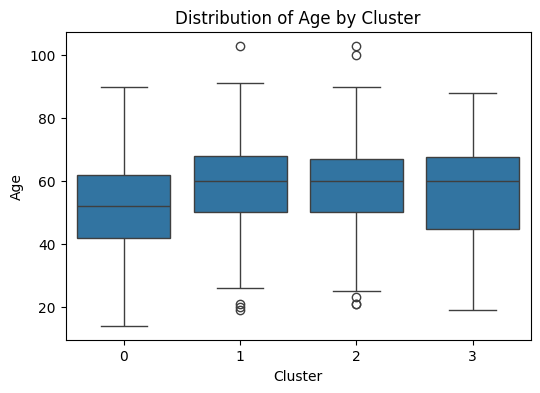

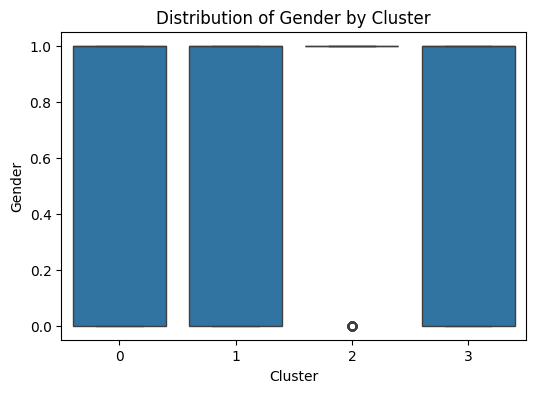

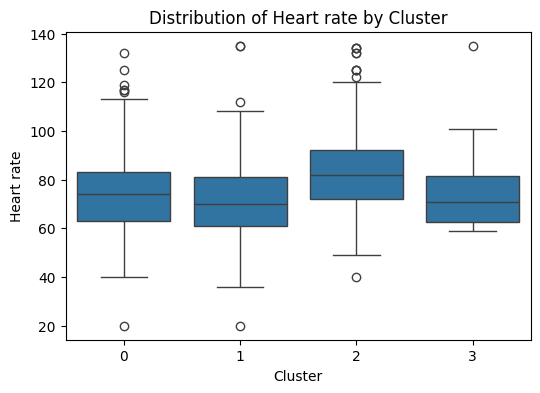

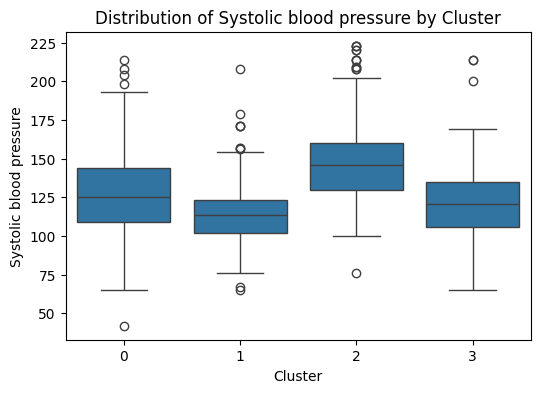

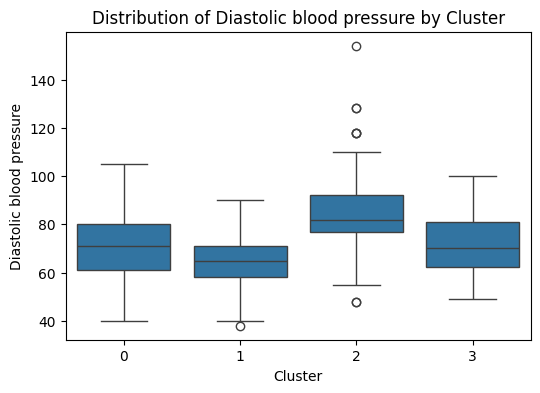

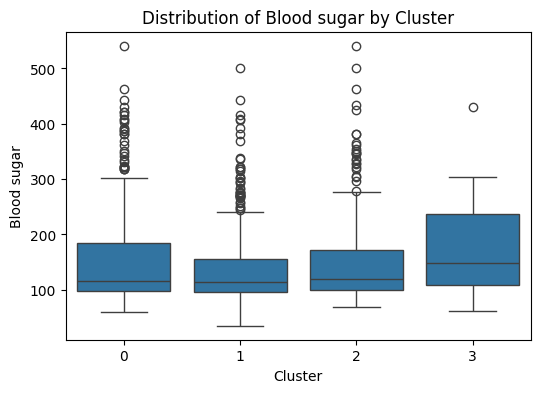

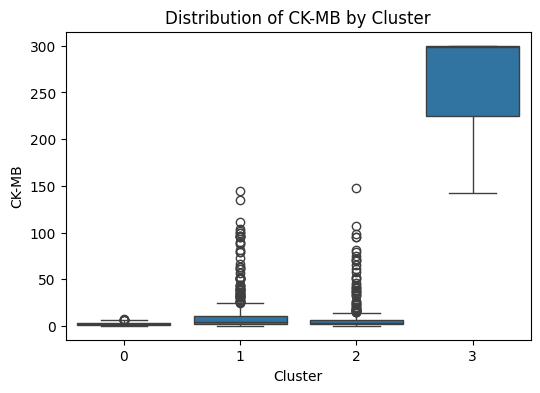

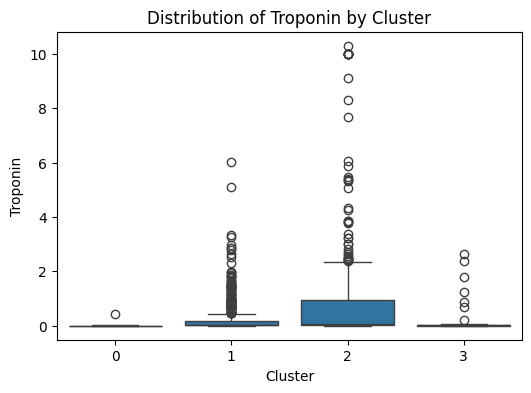

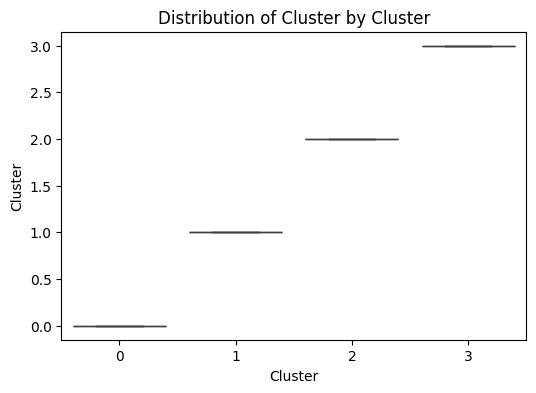

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_cols = df_mod.select_dtypes(include=['number']).columns.tolist()

# Remove the 'Result' column from the list if it's included, as we are plotting by Cluster
if 'Result' in numerical_cols:
    numerical_cols.remove('Result')

# Create box plots for each numerical variable, grouped by cluster
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_mod, x='Cluster', y=col)
    plt.title(f'Distribution of {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()